# Necessary functions and packages

In [1]:
from src.preprocess import preprocess
from src.HMM import HMM
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Data Preprocessing

## Comparing Sequences with no filtering and filtering

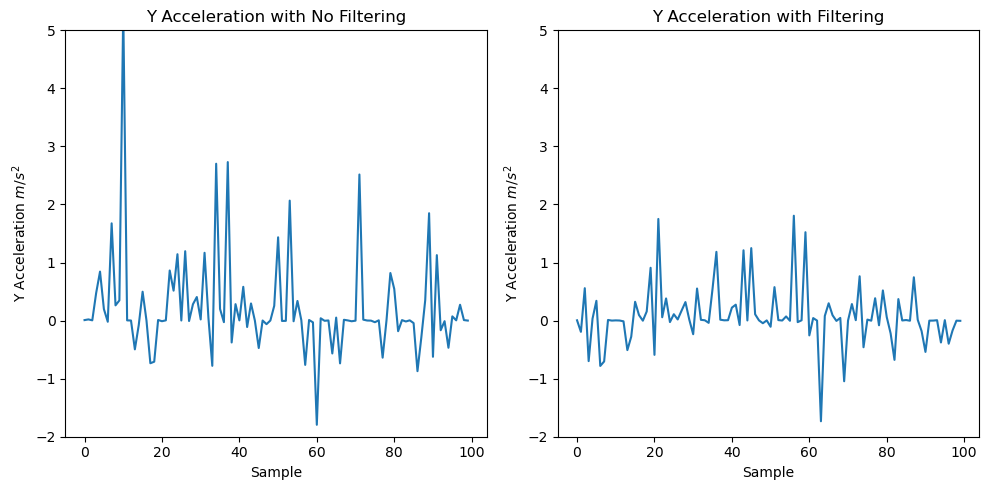

In [46]:
X_train, _, _, _ = preprocess(opt=False) 
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(X_train.values[0:100,1])
plt.xlabel("Sample")
plt.ylabel("Y Acceleration $m/s^2$")
plt.ylim([-2,5])
plt.title("Y Acceleration with No Filtering")

X_train, _, _, _ = preprocess(opt=True) 
plt.subplot(1,2,2)
plt.plot(X_train.values[0:100,1])
plt.xlabel("Sample")
plt.ylabel("Y Acceleration $m/s^2$")
plt.ylim([-2,5])
plt.title("Y Acceleration with Filtering")

plt.tight_layout()
plt.show()

In [43]:
X_train, X_test, y_train, y_test = preprocess() 


In [3]:
model = HMM(X_train, y_train, X_test)
predLabels = model.test()

Model is not converging.  Current: 69553.61199247335 is not greater than 69553.63374138564. Delta is -0.02174891228787601


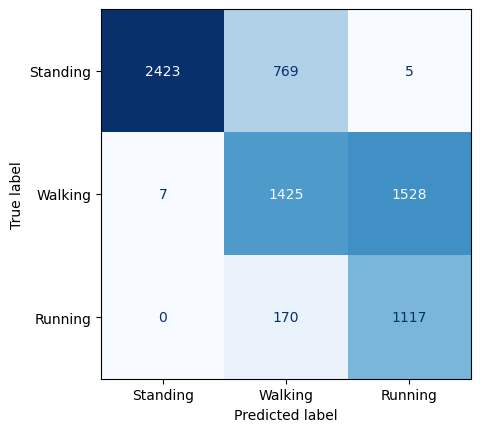

In [4]:
confusion_matrix = metrics.confusion_matrix(y_test, predLabels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                                            display_labels = ['Standing', 'Walking', 'Running'])
cm_display.plot(cmap = plt.cm.Blues, colorbar = False)
plt.show()

In [5]:
print("Accuracy:", accuracy_score(y_test, predLabels))
print("Classification Report:\n", classification_report(y_test, predLabels))

Accuracy: 0.6669801182160129
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86      3197
           1       0.60      0.48      0.54      2960
           2       0.42      0.87      0.57      1287

    accuracy                           0.67      7444
   macro avg       0.67      0.70      0.65      7444
weighted avg       0.74      0.67      0.68      7444

